# Exercise 05

### MIIIA

by 
        - Camilo Suárez            ca.suarezt    200321493
        - Jhon Alexander Hernández ja.hernandezp 200920588
        - Fernando Pérez           f-perez       200222809
        - Elquin Huertas           e.huertas     201920061


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales
- rolling forecast del ultimo 10% de fechas

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline

retail = pd.read_csv('C:/Users/stuka/Documents/GitHub/AdvancedMethodsDataAnalysisClass/datasets/example_retail_sales.csv')
retail.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [14]:
retailnorm = retail.copy()
retailnorm['y'] = np.log(retailnorm['y'])
retailnorm.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


## Aplicacion de prophet con serie original

In [15]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
m = Prophet()
m.fit(retail)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,470429.098324,460027.817788,480805.142396
295,2016-07-31,477511.078795,467589.906520,488178.678456
296,2016-08-31,454530.546471,444449.850101,464433.231248
297,2016-09-30,462896.353299,452711.294911,473143.503206
298,2016-10-31,468521.678045,458073.738144,479003.743611


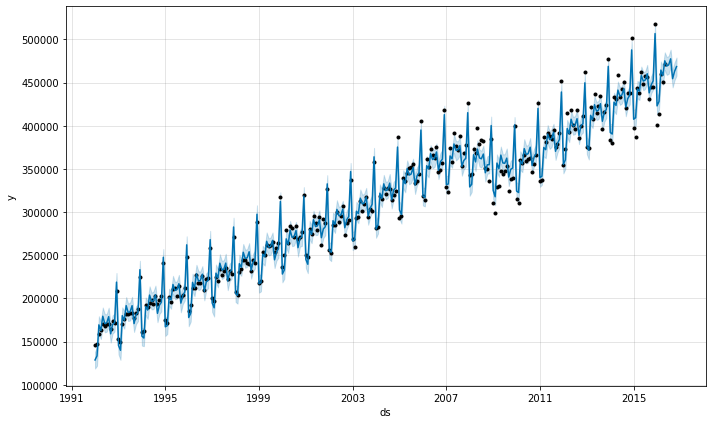

In [18]:
fig1 = m.plot(forecast)

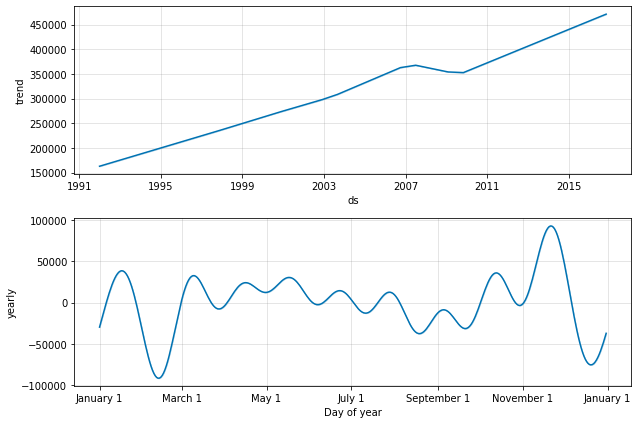

In [19]:
m.plot_components(forecast);

In [20]:
#Rolling de fb Prophet con serie original
muestra = int(len(retail['y'])*0.9)
train = retail[:muestra] 
test = retail[(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(retail['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

            ds           yhat
263 2013-12-01  473125.374872
            ds           yhat
264 2014-01-01  399367.121132
            ds           yhat
265 2014-02-01  398649.757064
            ds           yhat
266 2014-03-01  433783.890333
            ds           yhat
267 2014-04-01  430729.115475
            ds           yhat
268 2014-05-01  448201.154422
            ds           yhat
269 2014-06-01  442804.706688
            ds           yhat
270 2014-07-01  443798.992759
            ds           yhat
271 2014-08-01  452055.242585
            ds           yhat
272 2014-09-01  432045.792177
            ds           yhat
273 2014-10-01  440464.441483
            ds           yhat
274 2014-11-01  445542.766154
            ds           yhat
275 2014-12-01  494604.791772
            ds           yhat
276 2015-01-01  419638.369676
            ds           yhat
277 2015-02-01  421358.665929
            ds           yhat
278 2015-03-01  452513.942814
            ds           yhat
279 2015-0

In [22]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

16251.041883505903


## Aplicacion de prophet con la serie normalizada

In [23]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
m = Prophet()
m.fit(retailnorm)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [25]:
forecastnorm = m.predict(future)
forecastnorm[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057717,13.037457,13.077240
295,2016-07-31,13.082380,13.063927,13.102602
296,2016-08-31,13.015577,12.995021,13.036380
297,2016-09-30,13.037937,13.015957,13.057989
298,2016-10-31,13.055811,13.033512,13.078273


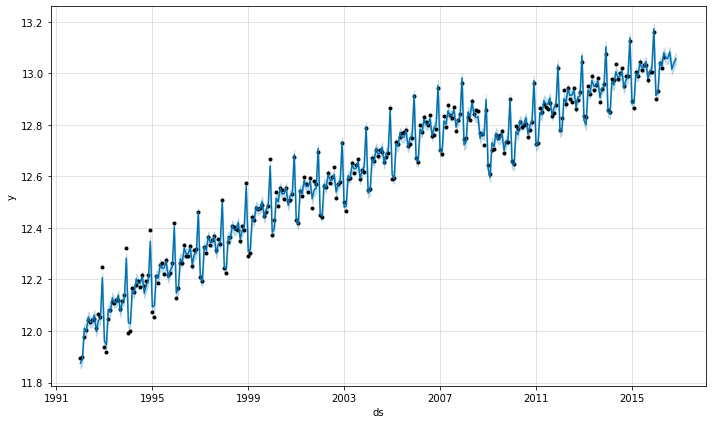

In [26]:
fig2 = m.plot(forecastnorm)

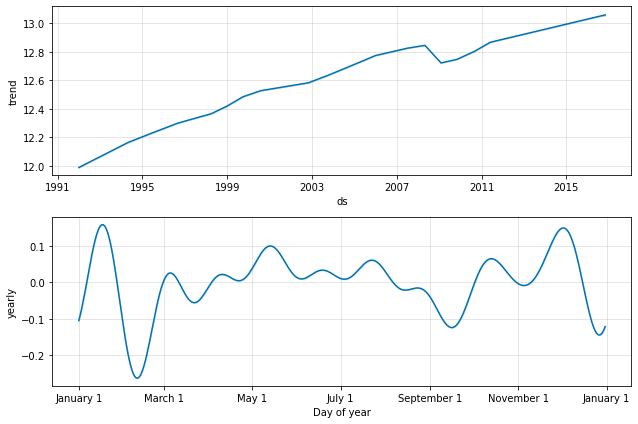

In [27]:
m.plot_components(forecastnorm);

In [34]:
#Rolling de fb Prophet con serie normalizada
muestra1 = int(len(retailnorm['y'])*0.9)
train1 = retailnorm[:muestra1] 
test1 = retailnorm[(muestra1):]
prediccionesnorm = np.zeros(len(test1))

for i in range(len(test1)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train1)
    future = pd.DataFrame(retailnorm['ds'][:(muestra1+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    prediccionesnorm[i] = forecast[['y']].values
print(prediccionesnorm)

            ds       yhat
263 2013-12-01  13.130253
            ds       yhat
264 2014-01-01  12.874848
            ds       yhat
265 2014-02-01  12.869583
            ds       yhat
266 2014-03-01  12.997047
            ds       yhat
267 2014-04-01  12.985776
            ds       yhat
268 2014-05-01  13.039897
            ds       yhat
269 2014-06-01  13.024445
            ds       yhat
270 2014-07-01  13.022996
            ds       yhat
271 2014-08-01  13.048914
            ds     yhat
272 2014-09-01  12.9821
            ds       yhat
273 2014-10-01  13.012632
            ds       yhat
274 2014-11-01  13.026484
            ds       yhat
275 2014-12-01  13.184994
            ds       yhat
276 2015-01-01  12.927304
            ds       yhat
277 2015-02-01  12.932996
            ds       yhat
278 2015-03-01  13.048902
            ds       yhat
279 2015-04-01  13.038894
            ds       yhat
280 2015-05-01  13.092551
            ds       yhat
281 2015-06-01  13.082147
            ds  

In [37]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test1['y'].values, prediccionesnorm) ** 0.5
print(RMSE)

0.05493727334550315
